# Introduction


This notebook is a comparison of simple trading strategies. 

Conventional wisdom tells you to "Buy Low" and "Sell High." This page will test how a trading strategy based on that wisdom will perform by backtesting trading strategies that test both "Buy Low" and the counter intuitive "Buy High".

The "Buy Low" strategy buys the stock at the 50 day low, and sells the stock at the 50 day high.

The "Buy High" strategy does the opposite. It will buy the stock at the 50 day high, and it will sell the stock at the 50 day low.

With all strategies shown below, the position sizing is "all in", as in all available capital is being used on the trade. In a real world scenario, this would not be the case. These are not stratgies I would recommend anyone use in the real world, and this certainly is not any sort of investing or trading advice. 

# Import Libraries

The first step is to import all the relevant libraries and code. 

In [1]:
import backtrader as bt
import backtrader.indicators as btind
import backtrader.feeds as btfeeds
from Base import run 
from Strategies.BuyHighSellLow import BuyHighSellLow
from Strategies.BuyLowSellHigh import BuyLowSellHigh
from Strategies.BuyAndHold import BuyAndHold

# Initialize Relevant Data

Step two is simply setting up the data. We are creating the starting cash variable, which is just $10,000 and declaring the data, which is the S&P 500 index from 1993 to March 12th of 2024, downloaded as a CSV from Yahoo Finance.

In [2]:
starting_cash = 10000.00
data = bt.feeds.YahooFinanceCSVData(
        dataname='SPY_max.csv')

# Run Buy High Strategy 

The following cell uses the "run" function to run the "Buy High" strategy that was imported. 

The output below the code are the trading logs, detailing every transaction that was simulated.

The cell below the output, will be code that outputs a chart of the strategy. 

In [3]:
buy_high = run(strategy=BuyHighSellLow, datafeed=data, starting_cash=starting_cash)
final_value_bh = buy_high.broker.getvalue()
return_perc_bh = ((final_value_bh - starting_cash) / starting_cash)
    
print(f'Final Portfolio Value Buy High: {final_value_bh:,.2f}')  
print(f'% return BuyHigh: {return_perc_bh:,.2%}')

1994-08-26, BUY CREATE, 27.98
1994-08-29, Order Canceled/Margin/Rejected
1994-08-29, BUY CREATE, 27.96
1994-08-30, BUY EXECUTED, Price: 27.95, Cost: 9996.42, Comm 0.00
2001-02-23, SELL CREATE, 81.51
2001-02-26, SELL EXECUTED, Price: 82.06, Cost: 9996.42, Comm 0.00
2001-02-26, OPERATION PROFIT, GROSS 19352.65, NET 19352.65
2003-11-07, BUY CREATE, 71.69
2003-11-10, Order Canceled/Margin/Rejected
2003-11-14, BUY CREATE, 71.59
2003-11-17, Order Canceled/Margin/Rejected
2003-12-01, BUY CREATE, 73.04
2003-12-02, BUY EXECUTED, Price: 72.90, Cost: 29296.38, Comm 0.00
2008-07-07, SELL CREATE, 92.65
2008-07-08, SELL EXECUTED, Price: 92.63, Cost: 29296.38, Comm 0.00
2008-07-08, OPERATION PROFIT, GROSS 7928.91, NET 7928.91
2010-03-12, BUY CREATE, 88.77
2010-03-15, BUY EXECUTED, Price: 88.61, Cost: 37214.36, Comm 0.00
2018-12-24, SELL CREATE, 215.96
2018-12-26, SELL EXECUTED, Price: 217.46, Cost: 37214.36, Comm 0.00
2018-12-26, OPERATION PROFIT, GROSS 54114.33, NET 54114.33
2019-04-12, BUY CREATE, 

<IPython.core.display.Javascript object>


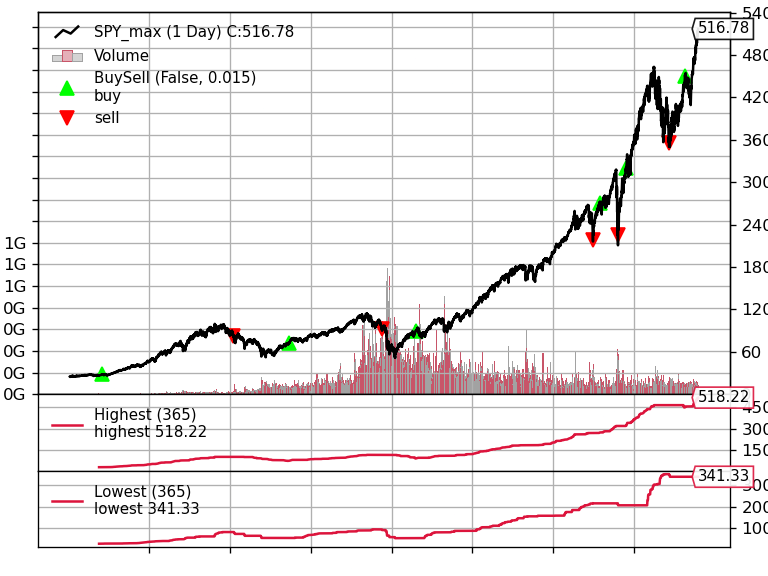

[[<Figure size 640x480 with 4 Axes>]]

In [4]:
buy_high.plot()
#it appears this is plotting the SPY more than it is plotting the portfolio, although the portfolio is being plotted
#on the top

# Run Buy Low strategy

In [5]:
buy_low = run(strategy=BuyLowSellHigh, datafeed=data, starting_cash=starting_cash)
final_value_bl = buy_low.broker.getvalue()
return_perc_bl = ((final_value_bl - starting_cash) / starting_cash)
    
print(f'Final Portfolio Value Buy Low: {final_value_bl:,.2f}')  
print(f'% return BuyLow: {return_perc_bl:,.2%}')

2001-02-23, BUY CREATE, 81.51
2001-02-26, Order Canceled/Margin/Rejected
2001-03-01, BUY CREATE, 81.28
2001-03-02, BUY EXECUTED, Price: 79.91, Cost: 9831.45, Comm 0.00
2003-11-07, SELL CREATE, 71.69
2003-11-10, SELL EXECUTED, Price: 71.78, Cost: 9831.45, Comm 0.00
2003-11-10, OPERATION PROFIT, GROSS -1000.25, NET -1000.25
2008-07-07, BUY CREATE, 92.65
2008-07-08, BUY EXECUTED, Price: 92.63, Cost: 8997.81, Comm 0.00
2010-03-12, SELL CREATE, 88.77
2010-03-15, SELL EXECUTED, Price: 88.61, Cost: 8997.81, Comm 0.00
2010-03-15, OPERATION PROFIT, GROSS -390.49, NET -390.49
2018-12-24, BUY CREATE, 215.96
2018-12-26, Order Canceled/Margin/Rejected
2018-12-26, BUY CREATE, 226.87
2018-12-27, BUY EXECUTED, Price: 223.54, Cost: 8482.90, Comm 0.00
2019-04-12, SELL CREATE, 268.58
2019-04-15, SELL EXECUTED, Price: 268.65, Cost: 8482.90, Comm 0.00
2019-04-15, OPERATION PROFIT, GROSS 1711.83, NET 1711.83
2020-03-18, BUY CREATE, 225.36
2020-03-19, BUY EXECUTED, Price: 224.66, Cost: 10289.04, Comm 0.00
20

<IPython.core.display.Javascript object>


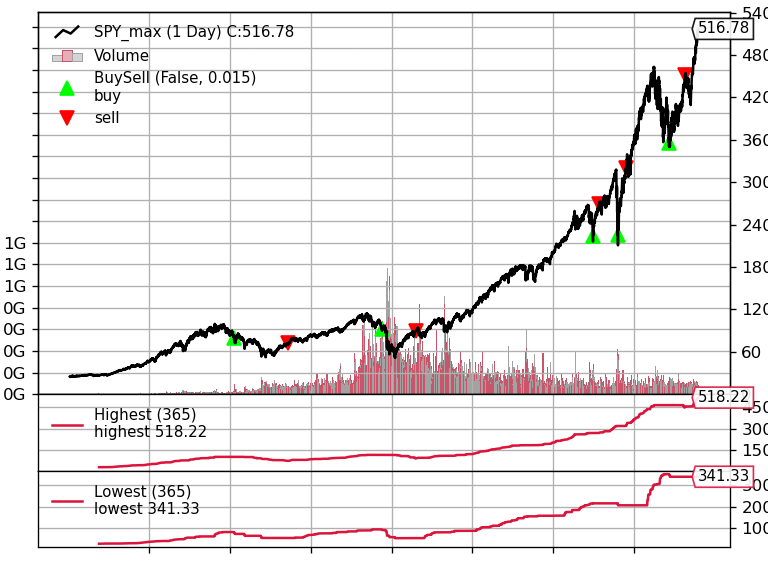

[[<Figure size 640x480 with 4 Axes>]]

In [6]:
buy_low.plot()

# Results 

As we can see here, the conventional wisdom is quite foolish. Buying at the highs and selling at the lows resulted in a significantly higher return than doing what conventional wisdom will tell you. 

Why is this the case?

It is quite simple and logical. When you buy at the high, the stock will typically run even higher, and you will ride that upward trend. When the stock finally hits a low, you will sell your stock, and it is likely the stock will run even lower, keeping you out of the draw downs. Take a look at the charts for a graphical reprensentation of this. The green arrows are the buys and the red arrows are the sell. When you sell high, you are missing out on significant gains when it runs higher, and when you sell at the low, you are avoiding a lower downward trend. This basic concept is the basis of a trading methodology aptly termed "Trend Following". 

To make this analysis complete, in the below cell we will calculate what the returns would be for a simple buy and hold strategy. 

In [7]:
buy_hold = run(strategy=BuyAndHold, datafeed=data, starting_cash=starting_cash)
final_value_bNh = buy_hold.broker.getvalue()
return_perc_bNh = ((final_value_bNh - starting_cash) / starting_cash)
    
print(f'Final Portfolio Value Buy and Hold: {final_value_bNh:,.2f}')  
print(f'% return Buy and Hold: {return_perc_bNh:,.2%}')

1993-01-29, BUY CREATE
1993-02-01, Order Canceled/Margin/Rejected
1993-02-01, BUY CREATE
1993-02-02, BUY EXECUTED, Price: 25.00, Cost: 9992.01, Comm 0.00
2024-03-12, Ending Value 206554.76
2024-03-12, --- Position Begin
- Size: 399.68025579536373
- Price: 25.0
- Price orig: 0.0
- Closed: 0
- Opened: 399.68025579536373
- Adjbase: 516.78
--- Position End
Final Portfolio Value Buy and Hold: 206,554.76
% return Buy and Hold: 1,965.55%


Lets put all the returns side by side now 

In [8]:
print(f'% return Buy and Hold: {return_perc_bNh:,.2%}')
print(f'% return Buy Low: {return_perc_bl:,.2%}')
print(f'% return Buy High: {return_perc_bh:,.2%}')

% return Buy and Hold: 1,965.55%
% return Buy Low: 86.60%
% return Buy High: 864.50%


As we can see, we these strategies, Buy and Hold reigns supreme as having the highest percentage return by a good margin. 
However, keep in mind this is a rudimentary trading strategy and is not a serious attempt at beating the market. The purpose of this is to simply show how in a trading system it is often a better idea to trade with the trend, than by attempting to go against the trend. 